# i.*PERKENALAN*

> **NAMA : Rifqi Julian Hasyari**

> **Batch : HCK 006**




 **latar belakang masalah:**
Dalam beberapa tahun terakhir terjadi wabah yang melanda seluruh dunia, yaitu wabah Covid-19. Covid-19 selalu mempengaruhi seluruh dunia, begitu banyak orang membuat dan mengumpulkan informasi dan menjadikannya dataset agar dapat dilakukan analisis dengan menggunakan machine learning dengan bahasa python. Pada analisis ini saya mengambil dataset public yang tersedia di google cloud. Untuk kebutuhan analisis yang saya lakukan saya menggunakan kolom province_state yang merupakan dimana letak provinsi kasus terjadi,country_region atau merupakan dimana letak negara tempat kasus terjadi,date atau tanggal kasus terjadi,confirmed merupakan total angka kasus yang terjadi di setiap hari,deaths merupakan total angka kasus kematian yang terjadi,recovered merupakan total angka pasien yang berhasil sembuh dan admin2 yang merupakan siapa yang menginput data tersebut.

> **Problem statement:**


1.   Di provinsi manakah yang memiliki angka kasus positif, kasus kematian dan kasus sembuh tertinggi di bulan januari-Juni 2020.
2. Bagaimana peningkatan jumlah kasus covid di provinsi yang memiliki jumlah kasus tertinggi, tunjukan peningkatan setiap bulan dari januari-juni 2020 dengan plot
3. Apakah peningkatan kasus positif covid akan diikuti dengan peningkatan pasien yang tidak memiliki status sembuh ataupun kematian?
4. Mengklasifikasikan provinsi mana yang butuh tim medis tambahan berdasarkan jumlah kasus kematian Covid-19 di tiap Provinsi.
5. Mengklasifikasikan provinsi mana yang berbahaya dan memerlukan lockdown dan karantina berdasarkan jumlah kasus positif Covid-19 di setiap provinsi. 












**Kode sql di google cloud**


> SELECT province_state,country_region,date,confirmed,deaths,recovered,admin2 FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` where country_region='Mainland China' and date between '2020-01-01'AND '2020-06-30' ORDER BY confirmed DESC


# ii. Import pustaka yang dibutuhkan

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

# iii.*Data Loading*

In [82]:
#Mengambil dataset yang telah diambil dari google cloud dan dilakukan read untuk membaca isi file nya.
#dataset tersebut dimasukan ke dalam dataframe yang dinamakan Data
Data=pd.read_csv('h8dsft_P0GC1_RifqiJulianHasyari.csv')
Data

,province_state,country_region,date,confirmed,deaths,recovered,admin2
0,Hubei,Mainland China,2020-03-10,67760.0,3024.0,47743.0,NaN
1,Hubei,Mainland China,2020-03-09,67743.0,3008.0,46488.0,NaN
2,Hubei,Mainland China,2020-03-08,67707.0,2986.0,45235.0,NaN
3,Hubei,Mainland China,2020-03-07,67666.0,2959.0,43500.0,NaN
4,Hubei,Mainland China,2020-03-06,67592.0,2931.0,42033.0,NaN
...,...,...,...,...,...,...,...
1512,Xinjiang,Mainland China,2020-01-22,NaN,NaN,NaN,NaN
1513,Qinghai,Mainland China,2020-01-24,NaN,NaN,NaN,NaN
1514,Inner Mongolia,Mainland China,2020-01-23,NaN,NaN,NaN,NaN
1515,Qinghai,Mainland China,2020-01-23,NaN,NaN,NaN,NaN


In [83]:
#menampilkan 3 head dari data 
Data.head(3)


,province_state,country_region,date,confirmed,deaths,recovered,admin2
0,Hubei,Mainland China,2020-03-10,67760.0,3024.0,47743.0,NaN
1,Hubei,Mainland China,2020-03-09,67743.0,3008.0,46488.0,NaN
2,Hubei,Mainland China,2020-03-08,67707.0,2986.0,45235.0,NaN


In [84]:
#menampilkan 3 tail dari data 
Data.tail(3)

,province_state,country_region,date,confirmed,deaths,recovered,admin2
1514,Inner Mongolia,Mainland China,2020-01-23,NaN,NaN,NaN,NaN
1515,Qinghai,Mainland China,2020-01-23,NaN,NaN,NaN,NaN
1516,Tibet,Mainland China,2020-01-23,NaN,NaN,NaN,NaN


In [85]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  1517 non-null   object 
 1   country_region  1517 non-null   object 
 2   date            1517 non-null   object 
 3   confirmed       1505 non-null   float64
 4   deaths          1265 non-null   float64
 5   recovered       1304 non-null   float64
 6   admin2          0 non-null      float64
dtypes: float64(4), object(3)
memory usage: 83.1+ KB


In [86]:
Data.describe()

,confirmed,deaths,recovered,admin2
count,1505.000000,1265.000000,1304.000000,0.0
mean,1643.550831,61.229249,689.907209,NaN
std,8690.247740,364.666982,3972.619302,NaN
min,0.000000,0.000000,0.000000,NaN
25%,71.000000,0.000000,15.000000,NaN
50%,168.000000,1.000000,80.000000,NaN
75%,505.000000,3.000000,274.000000,NaN
max,67760.000000,3024.000000,47743.000000,NaN


Berdasarkan informasi di atas, dapat diketahui bahwa:


*   Terdapat missing value yang ada pada kolom-kolom tersebut
*   Tipe data yang digunakan pada kolom-kolom tersebut perlu disesuaikan

Dataset tersebut akan dilanjutkan ke proses Data cleaning untuk dieksplorasi dan dibersihkan agar siap digunakan

# iv. *Data Cleaning*

In [87]:
#mengganti nama kolom agar lebih mudah dipahami
Data.rename(columns={'province_state':'Provinsi','country_region':'Negara',
                     'date':'Tanggal' ,'confirmed':'Kasus Positif','deaths':'Kematian'
                     ,'recovered':'Sembuh','admin2':'admin'},inplace=True)
Data

,Provinsi,Negara,Tanggal,Kasus Positif,Kematian,Sembuh,admin
0,Hubei,Mainland China,2020-03-10,67760.0,3024.0,47743.0,NaN
1,Hubei,Mainland China,2020-03-09,67743.0,3008.0,46488.0,NaN
2,Hubei,Mainland China,2020-03-08,67707.0,2986.0,45235.0,NaN
3,Hubei,Mainland China,2020-03-07,67666.0,2959.0,43500.0,NaN
4,Hubei,Mainland China,2020-03-06,67592.0,2931.0,42033.0,NaN
...,...,...,...,...,...,...,...
1512,Xinjiang,Mainland China,2020-01-22,NaN,NaN,NaN,NaN
1513,Qinghai,Mainland China,2020-01-24,NaN,NaN,NaN,NaN
1514,Inner Mongolia,Mainland China,2020-01-23,NaN,NaN,NaN,NaN
1515,Qinghai,Mainland China,2020-01-23,NaN,NaN,NaN,NaN


In [88]:
#menghapus kolom admin karena tidak akan digunakan
Data=Data.drop(['admin'],axis=1)
Data

,Provinsi,Negara,Tanggal,Kasus Positif,Kematian,Sembuh
0,Hubei,Mainland China,2020-03-10,67760.0,3024.0,47743.0
1,Hubei,Mainland China,2020-03-09,67743.0,3008.0,46488.0
2,Hubei,Mainland China,2020-03-08,67707.0,2986.0,45235.0
3,Hubei,Mainland China,2020-03-07,67666.0,2959.0,43500.0
4,Hubei,Mainland China,2020-03-06,67592.0,2931.0,42033.0
...,...,...,...,...,...,...
1512,Xinjiang,Mainland China,2020-01-22,NaN,NaN,NaN
1513,Qinghai,Mainland China,2020-01-24,NaN,NaN,NaN
1514,Inner Mongolia,Mainland China,2020-01-23,NaN,NaN,NaN
1515,Qinghai,Mainland China,2020-01-23,NaN,NaN,NaN


In [89]:
Data['NO_Status'] = Data['Kasus Positif'] - (Data['Sembuh']+Data['Kematian'])
Data= Data.reset_index(drop=True)

In [90]:
#mengecek unique value yang ada pada kolom negara
Data["Negara"].unique()

array(['Mainland China'], dtype=object)

In [91]:
#Mengganti tipe data kolom Tanggal yang sebelumnya object menjadi date time
Data["Tanggal"] = pd.to_datetime(Data["Tanggal"])

In [92]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Provinsi       1517 non-null   object        
 1   Negara         1517 non-null   object        
 2   Tanggal        1517 non-null   datetime64[ns]
 3   Kasus Positif  1505 non-null   float64       
 4   Kematian       1265 non-null   float64       
 5   Sembuh         1304 non-null   float64       
 6   NO_Status      1242 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 83.1+ KB


In [93]:
#Mengganti nilai missing value yang ada pada kolom kasus positif, kolom Kematian dan kolom Sembuh dengan angka 0. 
Data['Kasus Positif'] = Data['Kasus Positif'].fillna(0)
Data['Kematian'] = Data['Kematian'].fillna(0)
Data['Sembuh'] = Data['Sembuh'].fillna(0)
Data['NO_Status'] = Data['NO_Status'].fillna(0)

In [94]:
Data.isnull().sum()

Provinsi         0
Negara           0
Tanggal          0
Kasus Positif    0
Kematian         0
Sembuh           0
NO_Status        0
dtype: int64

In [95]:
Data.dropna(subset=['Provinsi'], inplace=True)
Data

,Provinsi,Negara,Tanggal,Kasus Positif,Kematian,Sembuh,NO_Status
0,Hubei,Mainland China,2020-03-10,67760.0,3024.0,47743.0,16993.0
1,Hubei,Mainland China,2020-03-09,67743.0,3008.0,46488.0,18247.0
2,Hubei,Mainland China,2020-03-08,67707.0,2986.0,45235.0,19486.0
3,Hubei,Mainland China,2020-03-07,67666.0,2959.0,43500.0,21207.0
4,Hubei,Mainland China,2020-03-06,67592.0,2931.0,42033.0,22628.0
...,...,...,...,...,...,...,...
1512,Xinjiang,Mainland China,2020-01-22,0.0,0.0,0.0,0.0
1513,Qinghai,Mainland China,2020-01-24,0.0,0.0,0.0,0.0
1514,Inner Mongolia,Mainland China,2020-01-23,0.0,0.0,0.0,0.0
1515,Qinghai,Mainland China,2020-01-23,0.0,0.0,0.0,0.0



*   Penjelasan dan alasan
Kode diatas merupakan kode untuk menghapus nilai missing value, pada kasus ini missing value dihapus dikarenakan missing value berada pada kolom provinsi yang datanya bukan merupakan numerik, sehingga saya memilih untuk menghapus missing value yang ada pada kolom ini

In [96]:
Data.isnull().sum()

Provinsi         0
Negara           0
Tanggal          0
Kasus Positif    0
Kematian         0
Sembuh           0
NO_Status        0
dtype: int64



*   Penjelasan
Berdasarkan kode diatas menunjukan bahwa sudah tidak ada lagi missing value yang ada pada dataset yang kita punya.

In [97]:
Data = Data.reset_index(drop=True)
Data

,Provinsi,Negara,Tanggal,Kasus Positif,Kematian,Sembuh,NO_Status
0,Hubei,Mainland China,2020-03-10,67760.0,3024.0,47743.0,16993.0
1,Hubei,Mainland China,2020-03-09,67743.0,3008.0,46488.0,18247.0
2,Hubei,Mainland China,2020-03-08,67707.0,2986.0,45235.0,19486.0
3,Hubei,Mainland China,2020-03-07,67666.0,2959.0,43500.0,21207.0
4,Hubei,Mainland China,2020-03-06,67592.0,2931.0,42033.0,22628.0
...,...,...,...,...,...,...,...
1512,Xinjiang,Mainland China,2020-01-22,0.0,0.0,0.0,0.0
1513,Qinghai,Mainland China,2020-01-24,0.0,0.0,0.0,0.0
1514,Inner Mongolia,Mainland China,2020-01-23,0.0,0.0,0.0,0.0
1515,Qinghai,Mainland China,2020-01-23,0.0,0.0,0.0,0.0


In [98]:
Data.sample(5)

,Provinsi,Negara,Tanggal,Kasus Positif,Kematian,Sembuh,NO_Status
1330,Jiangxi,Mainland China,2020-01-24,18.0,0.0,0.0,0.0
1379,Anhui,Mainland China,2020-01-23,9.0,0.0,0.0,0.0
490,Shanghai,Mainland China,2020-03-02,337.0,3.0,292.0,42.0
1099,Inner Mongolia,Mainland China,2020-02-19,75.0,0.0,10.0,65.0
902,Liaoning,Mainland China,2020-03-01,122.0,1.0,103.0,18.0


In [99]:
Data["Kasus Positif"] =Data["Kasus Positif"].astype("int")
Data["Kematian"] =Data["Kematian"].astype("int")
Data["Sembuh"] =Data["Sembuh"].astype("int")
Data["NO_Status"] =Data["NO_Status"].astype("int")



*   Penjelasan dan alasan


Pada kode diatas saya mengubah tipe data dari kolom Kasus Positif, kolom Kematian dan kolom Sembuh dari tipe data float menjadi integer.Saya melakukan hal tersebut dikarenakan data tersebut merupakan jumlah angka kasus yang dihitung berdasarkan berapa orang, maka dari itu data yang dimiliki tidak mungkin dalam bentuk desimal.

In [100]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Provinsi       1517 non-null   object        
 1   Negara         1517 non-null   object        
 2   Tanggal        1517 non-null   datetime64[ns]
 3   Kasus Positif  1517 non-null   int64         
 4   Kematian       1517 non-null   int64         
 5   Sembuh         1517 non-null   int64         
 6   NO_Status      1517 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 83.1+ KB


Dataset sudah dibersihkan dengan menghapus dan juga mengganti missing value yang ditemukan. Lalu pada proses ini juga dilakukan penggantian tipe data, mengganti nama kolom hingga menghapus kolom yang tidak dibutuhkan. Maka dari itu dataset sudah siap digunakan untuk eksplorasi lebih jauh di proses berikutnya.

# V. *Explorasi Data* 

In [101]:
Data_Positif=Data.groupby('Provinsi')[['Kasus Positif']].sum().sort_values(by='Kasus Positif', ascending=False) 
Data_Positif


,Kasus Positif
Provinsi,
Hubei,2013564
Guangdong,49143
Henan,45261
Zhejiang,45231
Hunan,37022
Anhui,34777
Jiangxi,33024
Shandong,23701
Jiangsu,22065


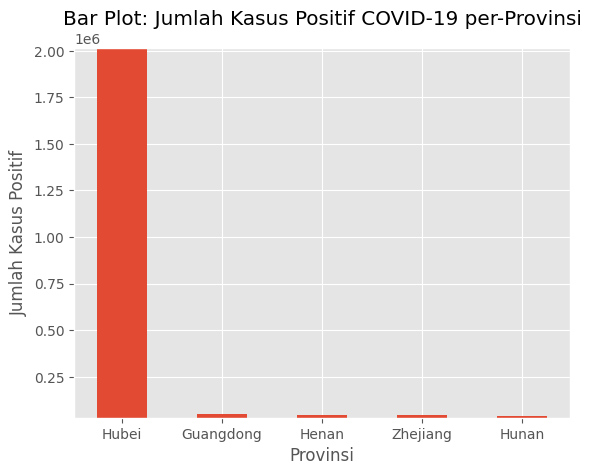

In [102]:
# creating our data values
style.use('ggplot')
x = np.array(["Hubei","Guangdong", "Henan", "Zhejiang", "Hunan"])
y = np.array([2013564,49143, 45261, 45231, 37022])


# creating our Bar chart with a width size of 0.1
plt.bar(x, y, width = 0.5)
plt.ylim(30000, max(y))

plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kasus Positif')
plt.title('Bar Plot: Jumlah Kasus Positif COVID-19 per-Provinsi')

# asking python to show us our plot
plt.show()

In [103]:
Data_Kematian=Data.groupby('Provinsi')[['Kematian']].sum().sort_values(by='Kematian', ascending=False) 
Data_Kematian

,Kematian
Provinsi,
Hubei,74542
Henan,570
Heilongjiang,389
Chongqing,179
Beijing,178
Anhui,173
Hebei,166
Guangdong,161
Hainan,159


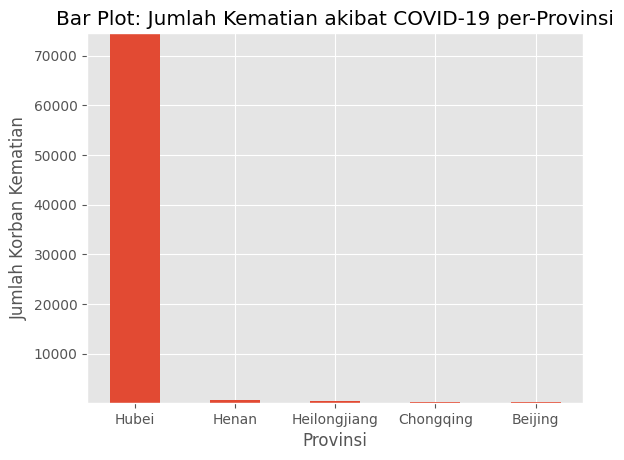

In [104]:
# creating our data values
style.use('ggplot')
x = np.array(["Hubei","Henan", "Heilongjiang", "Chongqing", "Beijing"])
y = np.array([74542,570, 389, 179, 178])


# creating our Bar chart with a width size of 0.1
plt.bar(x, y, width = 0.5)
plt.ylim(100, max(y))

plt.xlabel('Provinsi')
plt.ylabel('Jumlah Korban Kematian')
plt.title('Bar Plot: Jumlah Kematian akibat COVID-19 per-Provinsi')

# asking python to show us our plot
plt.show()

In [105]:
Data_Sembuh=Data.groupby('Provinsi')[['Sembuh']].sum().sort_values(by='Sembuh', ascending=True) 
Data_Sembuh

,Sembuh
Provinsi,
Tibet,28
Qinghai,482
Inner Mongolia,1061
Xinjiang,1133
Ningxia,1614
Jilin,1764
Gansu,2150
Liaoning,2227
Tianjin,2426


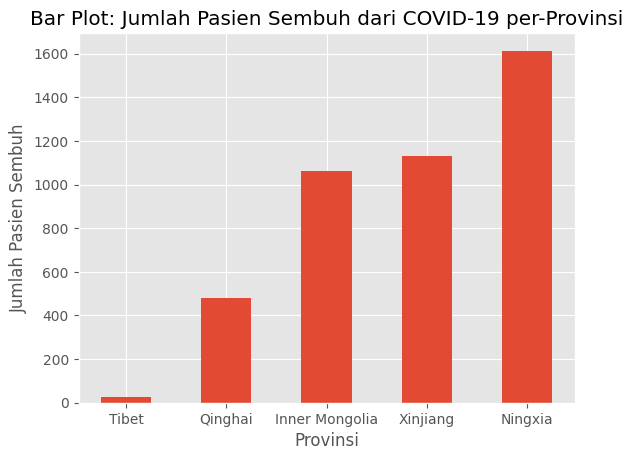

In [106]:
# creating our data values
style.use('ggplot')
x = np.array(["Tibet","Qinghai", "Inner Mongolia", "Xinjiang", "Ningxia"])
y = np.array([28,482, 1061, 1133, 1614])


# creating our Bar chart with a width size of 0.1
plt.bar(x, y, width = 0.5)
#plt.ylim(100, max(y))

plt.xlabel('Provinsi')
plt.ylabel('Jumlah Pasien Sembuh')
plt.title('Bar Plot: Jumlah Pasien Sembuh dari COVID-19 per-Provinsi')

# asking python to show us our plot
plt.show()

In [107]:
DataHubei=Data[ (Data['Provinsi']=='Hubei')][['Provinsi', 'Kasus Positif','Sembuh','Kematian','Tanggal','NO_Status']]
DataHubei

,Provinsi,Kasus Positif,Sembuh,Kematian,Tanggal,NO_Status
0,Hubei,67760,47743,3024,2020-03-10,16993
1,Hubei,67743,46488,3008,2020-03-09,18247
2,Hubei,67707,45235,2986,2020-03-08,19486
3,Hubei,67666,43500,2959,2020-03-07,21207
4,Hubei,67592,42033,2931,2020-03-06,22628
5,Hubei,67466,40592,2902,2020-03-05,23972
6,Hubei,67332,38557,2871,2020-03-04,25904
7,Hubei,67217,36208,2835,2020-03-03,28174
8,Hubei,67103,33934,2803,2020-03-02,30366
9,Hubei,66907,31536,2761,2020-03-01,32610


In [108]:
Januari=Data[Data['Tanggal'].between('2020-01-01', '2020-01-31')].groupby('Tanggal').agg({'Kasus Positif': 'sum', 'Sembuh': 'sum', 'Kematian': 'sum'})
Januari

,Kasus Positif,Sembuh,Kematian
Tanggal,,,
2020-01-22,547,28,17
2020-01-23,639,30,18
2020-01-24,916,36,26
2020-01-25,1399,39,42
2020-01-26,2062,49,56
2020-01-27,2863,58,82
2020-01-28,5494,101,131
2020-01-29,6070,120,133
2020-01-30,8124,135,171


In [109]:
Januari['NO_Status'] = Januari['Kasus Positif'] - (Januari['Sembuh']+Januari['Kematian'])
Januari

,Kasus Positif,Sembuh,Kematian,NO_Status
Tanggal,,,,
2020-01-22,547,28,17,502
2020-01-23,639,30,18,591
2020-01-24,916,36,26,854
2020-01-25,1399,39,42,1318
2020-01-26,2062,49,56,1957
2020-01-27,2863,58,82,2723
2020-01-28,5494,101,131,5262
2020-01-29,6070,120,133,5817
2020-01-30,8124,135,171,7818


Text(0.5, 1.0, 'Line Plot: Perkembangan Kasus Positif dan No Status')

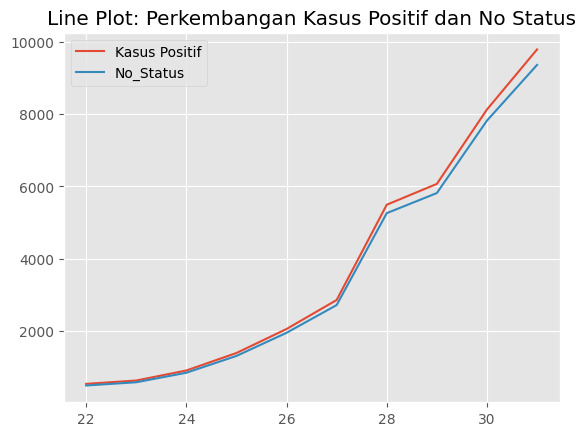

In [110]:
DataPLT = pd.DataFrame({
   'Kasus Positif': [547, 639, 916, 1399,2062,2863,5494,6070,8124,9783],
   'No_Status': [502, 591, 854,1318, 1957,2723,5262,5817,7818,9356]
   }, index=[22, 23, 24, 25, 26,27,28,29,30,31])
lines = DataPLT.plot.line()
lines.set_title('Line Plot: Perkembangan Kasus Positif dan No Status')


Hasil pada line plot diatas menunjukan bahwa peningkatan nilai kasus positif akan mempengaruhi pula nilai dari pasien yang tidak memiliki status sembuh ataupun kematian.

In [111]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Provinsi       1517 non-null   object        
 1   Negara         1517 non-null   object        
 2   Tanggal        1517 non-null   datetime64[ns]
 3   Kasus Positif  1517 non-null   int64         
 4   Kematian       1517 non-null   int64         
 5   Sembuh         1517 non-null   int64         
 6   NO_Status      1517 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 83.1+ KB


In [112]:
Data_Positif

,Kasus Positif
Provinsi,
Hubei,2013564
Guangdong,49143
Henan,45261
Zhejiang,45231
Hunan,37022
Anhui,34777
Jiangxi,33024
Shandong,23701
Jiangsu,22065


In [113]:
Data_Positif['Kategori Keamanan']=' '
for i in range(len(Data_Positif)):
  if Data_Positif['Kasus Positif'][i] >= 50000:
    Data_Positif['Kategori Keamanan'][i]='Lockdown dan Karantina Total'
  elif Data_Positif['Kasus Positif'][i]>=25000 and Data_Positif['Kasus Positif'][i] < 50000:
    Data_Positif['Kategori Keamanan'][i]='Karantina'
  elif Data_Positif['Kasus Positif'][i]>=5000 and Data_Positif['Kasus Positif'][i] < 25000:
    Data_Positif['Kategori Keamanan'][i]='Siaga'
  else:
    Data_Positif['Kategori Keamanan'][i]='Awas'
Data_Positif

<ipython-input-113-5072e7eab46a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Positif['Kategori Keamanan'][i]='Lockdown dan Karantina Total'
<ipython-input-113-5072e7eab46a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Positif['Kategori Keamanan'][i]='Karantina'
<ipython-input-113-5072e7eab46a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Positif['Kategori Keamanan'][i]='Siaga'
<ipython-input-113-5072e7eab46a

,Kasus Positif,Kategori Keamanan
Provinsi,,
Hubei,2013564,Lockdown dan Karantina Total
Guangdong,49143,Karantina
Henan,45261,Karantina
Zhejiang,45231,Karantina
Hunan,37022,Karantina
Anhui,34777,Karantina
Jiangxi,33024,Karantina
Shandong,23701,Siaga
Jiangsu,22065,Siaga


Kode diatas dibuat untuk melakukan klasifikasi berdasarkan jumlah kasus covid-19 di setiap provinsi. 
Kondisi : 


1.   Jika di kota A memiliki kasus positif covid >= 50000,maka diklasifikasikan Lockdown dan Karantina Total
2.   Jika di kota A memiliki kasus covid >=25000 dan < 50000, maka diklasifikasikan Karantina
3. Jika di kota A memiliki kasus covid >=5000 dan < 25000, maka diklasifikasikan Siaga
4. Jika kota A memiliki kasus covid tidak termasuk ke dalam 3 kondisi di atas, maka diklasifikasikan awas



In [114]:
Data_Kematian['Kategori']=' '
for i in range(len(Data_Kematian)):
  if Data_Kematian['Kematian'][i] >= 1000 and Data_Kematian['Kematian'][i] <= 100000:
    Data_Kematian['Kategori'][i]='Prioritas'
  elif Data_Kematian['Kematian'][i]>=500 and Data_Kematian['Kematian'][i] < 1000:
    Data_Kematian['Kategori'][i]='Prioritas ke 2'
  elif Data_Kematian['Kematian'][i]>=100 and Data_Kematian['Kematian'][i] < 500:
    Data_Kematian['Kategori'][i]='cukup'
  else:
    Data_Kematian['Kategori'][i]='Aman'
Data_Kematian

<ipython-input-114-0819c22be95a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Kematian['Kategori'][i]='Prioritas'
<ipython-input-114-0819c22be95a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Kematian['Kategori'][i]='Prioritas ke 2'
<ipython-input-114-0819c22be95a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Kematian['Kategori'][i]='cukup'
<ipython-input-114-0819c22be95a>:10: SettingWithCopyWarning: 
A value

,Kematian,Kategori
Provinsi,,
Hubei,74542,Prioritas
Henan,570,Prioritas ke 2
Heilongjiang,389,cukup
Chongqing,179,cukup
Beijing,178,cukup
Anhui,173,cukup
Hebei,166,cukup
Guangdong,161,cukup
Hainan,159,cukup


Kode diatas dibuat untuk melakukan klasifikasi apakah di provinsi tersebut membutuhkan tim medis tambahan berdasarkan jumlah kasus kematian covid-19 di setiap provinsi. 
Kondisi : 


1.   Jika di kota A memiliki kasus kematian covid >= 1000 dan <= 100000 ,maka diklasifikasikan provinsi tersebut menjadi prioritas pertama yang membutuhkan tim medis tambahan.
2.   Jika di kota A memiliki kasus kematian covid >=500 dan < 1000 ,maka diklasifikasikan provinsi tersebut menjadi prioritas kedua yang membutuhkan tim medis tambahan.
3. Jika di kota A memiliki kasus kematian covid >=100 dan < 500 ,maka diklasifikasikan provinsi tersebut memiliki tim medis yang cukup.
4. Jika di kota A memiliki kasus kematian covid tidak masuk ke dalam 3 kondisi diatas maka dinyatakan Provinsi tersebut aman dan tidak perlu untuk mendapatkan tim medis tambahan.


# **VI. Penarikan Kesimpulan**



1.   Pada dataset yang diambil berisikan data kasus covid-19 yang ada di Negara Mainland China. Setelah data dibersihkan, dapat dilihat bahwa provinsi Hubei merupakan provinsi dengan jumlah kasus positif Covid-19 terbanyak, dengan total 2013564 kasus. Kemudian provinsi Hubei juga menjadi provinsi dengan angka kematian tertinggi dibandingkan provinsi lainnya yaitu dengan total 74542 kasus, dan provinsi Hubei juga memiliki jumlah pasien sembuh terbanyak dengan total 658748 kasus. 
2. saya mengumpulkan informasi tentang kasus positif di kota Hubei dan juga tentang NO_Status kasus atau pasien yang positif Covid tetapi tidak diketahui statusnya apakah sudah sembuh atau meninggal. Setelah dilakukan perbandingan dengan menggunakan visualisasi data berupa line plot, terlihat bahwa seiring dengan peningkatan nilai kasus positif Covid, maka nilai NO_Status pasien juga meningkat. 
3. Setelah dilakukan klasifikasi berdasarkan total kasus positif yang terjadi di China diperoleh data bahwa kota Hubei diklasifikasikan Lockdown dan Karantina Total, kota Guangdong diklasifikasikan Karantina, kota Henan diklasifikasikan karantina dan seterusnya.
4. Setelah dilakukan klasifikasi berdasarkan total kasus kematian yang terjadi di china diperoleh data bahwa kota Hubei menjadi provinsi yang menjadi prioritas utama untuk mendapatkan tim medis tambahan, kota Henan menjadi prioritas ke 2 dan seterusnya
